# EDA
## 1. 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

In [3]:
demo = pd.read_csv("./data/LPOINT_BIG_COMP_01_DEMO.csv")
pdde = pd.read_csv("./data/LPOINT_BIG_COMP_02_PDDE.csv")
cop_u = pd.read_csv("./data/LPOINT_BIG_COMP_03_COP_U.csv")
pd_clac = pd.read_csv("./data/LPOINT_BIG_COMP_04_PD_CLAC.csv")
br = pd.read_csv("./data/LPOINT_BIG_COMP_05_BR.csv")
lpay = pd.read_csv("./data/LPOINT_BIG_COMP_06_LPAY.csv")

<ipython-input-3-4859a2928da7>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  pdde = pd.read_csv("./data/LPOINT_BIG_COMP_02_PDDE.csv")


### 결측치 확인
- __pdde__ > br_c 약 40만개 결측
- __cop_u__ > br_c 55개 결측

In [3]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cust       29913 non-null  object
 1   ma_fem_dv  29913 non-null  object
 2   ages       29913 non-null  object
 3   zon_hlv    29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [4]:
pdde.info(show_counts=True)  # info()로 Non-Null Count가 보이지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381743 entries, 0 to 4381742
Data columns (total 10 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   cust     4381743 non-null  object 
 1   rct_no   4381743 non-null  object 
 2   chnl_dv  4381743 non-null  int64  
 3   cop_c    4381743 non-null  object 
 4   br_c     3953242 non-null  object 
 5   pd_c     4381743 non-null  object 
 6   de_dt    4381743 non-null  int64  
 7   de_hr    4381743 non-null  int64  
 8   buy_am   4381743 non-null  float64
 9   buy_ct   4381743 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 334.3+ MB


In [5]:
cop_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cust     248304 non-null  object
 1   rct_no   248304 non-null  object
 2   cop_c    248304 non-null  object
 3   br_c     248249 non-null  object
 4   chnl_dv  248304 non-null  int64 
 5   de_dt    248304 non-null  int64 
 6   vst_dt   248304 non-null  int64 
 7   de_hr    248304 non-null  int64 
 8   buy_am   248304 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.0+ MB


In [6]:
pd_clac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pd_c          1933 non-null   object
 1   pd_nm         1933 non-null   object
 2   clac_hlv_nm   1933 non-null   object
 3   clac_mcls_nm  1933 non-null   object
dtypes: object(4)
memory usage: 60.5+ KB


In [7]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   br_c      8808 non-null   object
 1   cop_c     8808 non-null   object
 2   zon_hlv   8808 non-null   object
 3   zon_mcls  8808 non-null   object
dtypes: object(4)
memory usage: 275.4+ KB


In [8]:
lpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cust     353184 non-null  object
 1   rct_no   353184 non-null  int64 
 2   cop_c    353184 non-null  object
 3   chnl_dv  353184 non-null  int64 
 4   de_dt    353184 non-null  int64 
 5   de_hr    353184 non-null  int64 
 6   buy_am   353184 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.9+ MB


In [17]:
# pdde[pdde['br_c'].isnull()]
len(pdde[pdde['br_c'].isnull()].index.tolist())

428501

## 2. 데이터 시각화
### (1) 고객 데모 정보 (demo)

총 29913명의 사용자 데이터가 있다.
* 사용자 성별 비교 : 여성이 남성에 비해 약 2배 정도 많다.
* 사용자 나이대 비교 : 40대까지 사용자가 많아지다가, 50대부터 급격하게 낮아진다.

In [10]:
demo.head()

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
## 폰트 리스트 확인
# import matplotlib.font_manager as fm

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

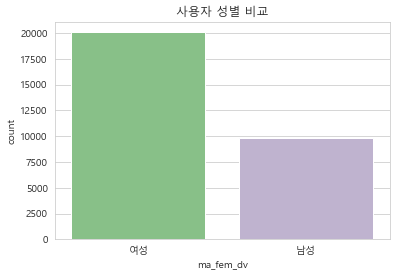

In [77]:
## 사용자 성별 비교
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 깨짐 때문에 넣은 코드
plt.title('사용자 성별 비교')
sns.countplot(x='ma_fem_dv', palette='Accent', data=demo)
plt.show()

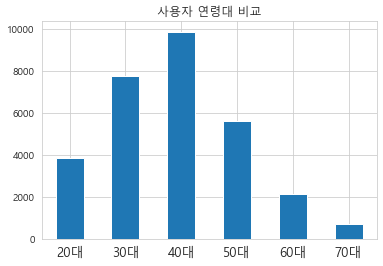

In [34]:
## 사용자 연령대 비교
bar_df = demo['ages'].value_counts().sort_index()
bar_df.plot(kind='bar')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('사용자 연령대 비교')
plt.xticks(rotation=0, fontsize=13)
plt.show()

In [22]:
demo['zon_hlv'].value_counts()

Z10    8157
Z17    7881
Z16    2503
Z11    1840
Z04    1750
Z06    1080
Z14     988
Z13     896
Z12     803
Z08     739
Z15     677
Z09     642
Z03     600
Z05     576
Z01     474
Z07     204
Z02     103
Name: zon_hlv, dtype: int64

### (2) 상품 구매 정보 (pdde)
br_c 변수 40만개 결측 존재.
* 오프라인/온라인 비교 : 오프라인(1) 사용자가 온라인(2)보다 80배 많다.
* 제휴사 별 비교 : A02에 사용자가 압도적으로 많고, A05는 거의 없다.

In [16]:
pdde.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


1    3953242
2     428501
Name: chnl_dv, dtype: int64


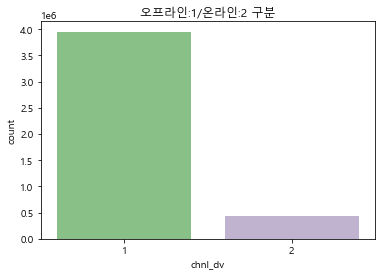

In [33]:
# 오프라인/온라인 사용자 비교
print(pdde['chnl_dv'].value_counts())
sns.countplot(x='chnl_dv', palette='Accent', data=pdde)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('오프라인:1/온라인:2 구분')
plt.show()

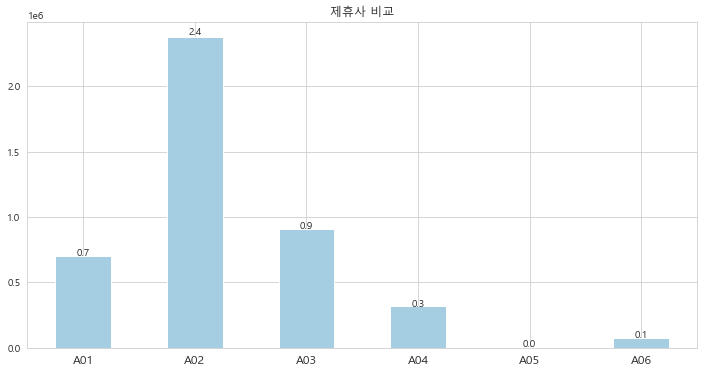

In [98]:
## 제휴사 비교
plt.figure(figsize=(12,6))
ax = pdde['cop_c'].value_counts().sort_index().plot(kind='bar', title='제휴사 비교', colormap='Paired')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height/1e6), (left+width/2, height*1.01), ha='center')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xticks(rotation=0, fontsize=12)
plt.show()

### (3) 제휴사 이용 정보 (cop_u)
br_c 변수 55개 결측 존재.
* 제휴사 비교 : pdde 데이터보다는 고루 퍼져 있다. D01이 가장 사용자가 많다.

In [72]:
cop_u.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


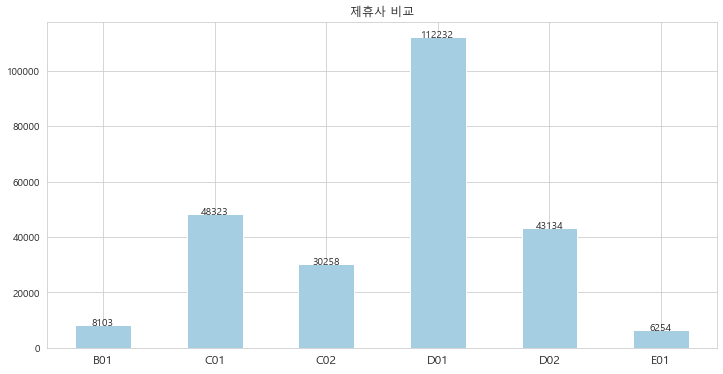

In [95]:
## 제휴사 비교
plt.figure(figsize=(12,6))
ax = cop_u['cop_c'].value_counts().sort_index().plot(kind='bar', title='제휴사 비교', colormap='Paired')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.f"%(height), (left+width/2, height), ha='center')

plt.xticks(rotation=0, fontsize=12)
plt.show()

### (4) 상품 분류 정보 (pd_clac)

In [99]:
pd_clac.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [105]:
## 겹치는 상품 유무 확인
sum(pd_clac.pd_c.value_counts() != 1)

0

In [119]:
print('대분류명 개수:', len(pd_clac.clac_hlv_nm.unique()))
print('대분류명 종류:\n', pd_clac.clac_hlv_nm.value_counts())

대분류명 개수: 60
대분류명 종류:
 패션잡화          130
축산물            91
수산물            88
스포츠패션          82
문구/사무용품        72
채소             72
유아동의류          67
과일             58
속옷/양말/홈웨어      56
조미료            51
화장품/뷰티케어       50
생활/주방가전        43
퍼스널케어          39
원예/애완          39
구기/필드스포츠       38
조리식품           38
식기/조리기구        36
과자             36
침구/수예          35
자동차용품          35
아웃도어/레저        34
건강식품           32
출산/육아용품        32
냉장식품           32
주방잡화           32
가구             31
완구             31
건해산물           30
청소/세탁/욕실용품     30
여성의류           29
대용식            29
세제/위생          28
영상/음향가전        27
남성의류           26
건강용품           25
음료             24
테넌트/음식점        22
주류             22
시즌스포츠          22
인테리어/조명        21
커피/차           20
냉동식품           20
헬스/피트니스        15
양곡             15
서적/음반/악기       15
공구/안전용품        15
계절가전           15
컴퓨터            14
병통조림           14
생활/렌탈서비스       13
냉장/세탁가전        12
상품권            10
유제품             9
기타(비상품)         7
담배    

### (5) 점포 정보 (br)

In [4]:
br.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [5]:
print('점포 개수:', len(br.cop_c.unique()))
print('점포 종류:\n', br.cop_c.value_counts())

점포 개수: 11
점포 종류:
 A04    5646
D01    1311
D02     535
A03     487
A05     440
C01     140
A02     116
A01      66
E01      43
B01      20
C02       4
Name: cop_c, dtype: int64


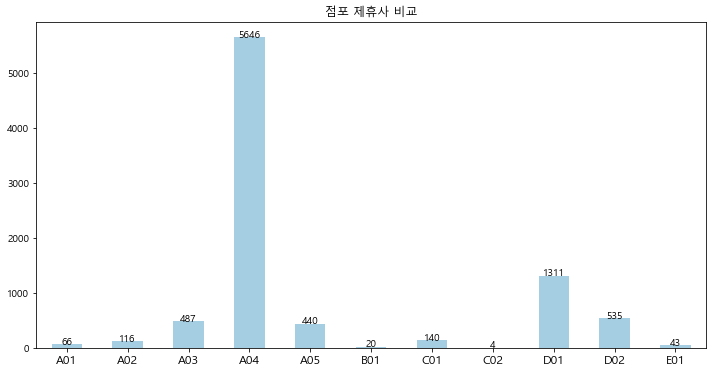

In [10]:
## 점포 제휴사 비교
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12,6))
ax = br['cop_c'].value_counts().sort_index().plot(kind='bar', title='점포 제휴사 비교', colormap='Paired')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.f"%(height), (left+width/2, height), ha='center')
    
plt.xticks(rotation=0, fontsize=12)
plt.show()

In [13]:
print('고객거주대분류코드:\n', demo['zon_hlv'].value_counts())
print('점포대분류코드:\n', br['zon_hlv'].value_counts())

고객거주대분류코드:
 Z10    8157
Z17    7881
Z16    2503
Z11    1840
Z04    1750
Z06    1080
Z14     988
Z13     896
Z12     803
Z08     739
Z15     677
Z09     642
Z03     600
Z05     576
Z01     474
Z07     204
Z02     103
Name: zon_hlv, dtype: int64
점포대분류코드:
 Z10    2141
Z17    1723
Z11     552
Z16     539
Z04     440
Z14     428
Z12     423
Z08     386
Z01     353
Z09     324
Z06     321
Z05     276
Z13     241
Z15     240
Z07     197
Z03     171
Z02      53
Name: zon_hlv, dtype: int64


In [19]:
idx = np.arange(17)
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

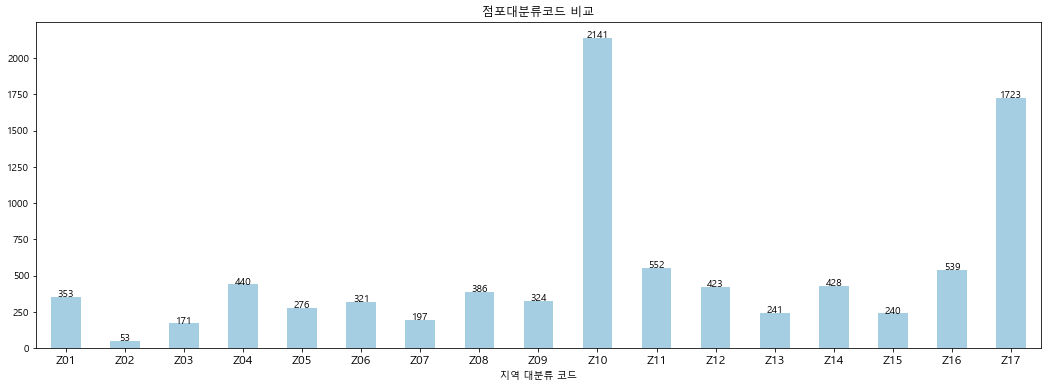

In [27]:
## 점포 대분류코드 비교
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(18,6))
ax1 = br['zon_hlv'].value_counts().sort_index().plot(kind='bar', title='점포대분류코드 비교', colormap='Paired',width=0.5)
# ax2 = demo['zon_hlv'].value_counts().sort_index().plot(kind='bar', title='점포대분류코드 비교', colormap='Paired',width=0.5)

for p in ax1.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax1.annotate("%.f"%(height), (left+width/2, height), ha='center')
# for p in ax2.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     ax2.annotate("%.f"%(height), (left+width/2, height), ha='center', color="red")
    
plt.xlabel('지역 대분류 코드')
plt.xticks(rotation=0, fontsize=12)
plt.show()

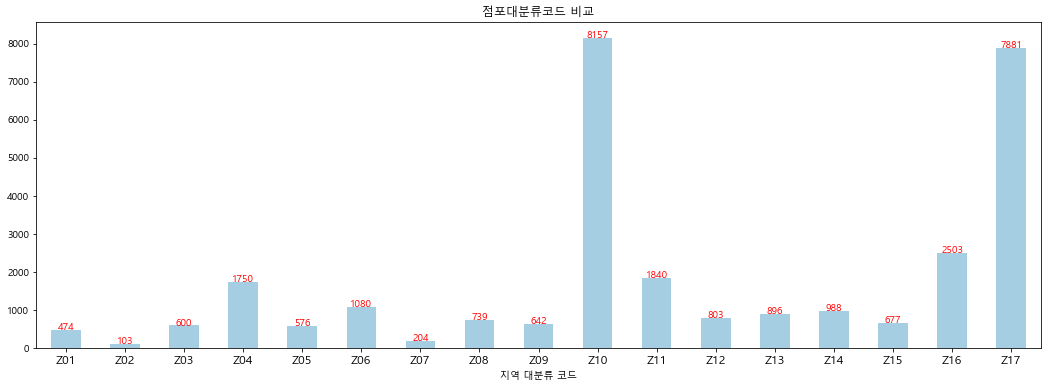

In [28]:
## 고객 대분류코드 비교
idx = np.arange(17)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(18,6))
ax2 = demo['zon_hlv'].value_counts().sort_index().plot(kind='bar', title='점포대분류코드 비교', colormap='Paired',width=0.5)

for p in ax2.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax2.annotate("%.f"%(height), (left+width/2, height), ha='center', color="red")
    
plt.xlabel('지역 대분류 코드')
plt.xticks(rotation=0, fontsize=12)
plt.show()

### (6) 엘페이 이용 (lpay)
21년도에 대한 데이터이고, 하지만 이용일자에 대해 정렬되어 있지 않다. 

In [4]:
lpay.head()

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


In [38]:
print(lpay['de_dt'].head())
print(lpay['de_dt'].tail())
print(lpay['de_dt'].min())
print(lpay['de_dt'].max())

0    20210803
1    20210803
2    20210803
3    20210803
4    20210803
Name: de_dt, dtype: int64
353179    20210125
353180    20210104
353181    20210119
353182    20210119
353183    20210119
Name: de_dt, dtype: int64
20210101
20211231


In [39]:
print(lpay['buy_am'].min())
print(lpay['buy_am'].max())

5
30000000


2    203174
1    150010
Name: chnl_dv, dtype: int64


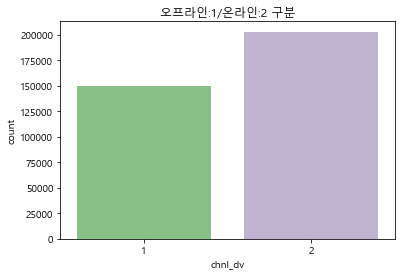

In [32]:
# 오프라인/온라인 사용자 비교
print(lpay['chnl_dv'].value_counts())
sns.countplot(x='chnl_dv', palette='Accent', data=lpay)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('오프라인:1/온라인:2 구분')
plt.show()